<a href="https://colab.research.google.com/github/fmuranda/Climate_Science./blob/main/xarray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
data = xr.DataArray(np.random.randn(2, 3), dims=("x", "y"), coords={"x": [10, 20]})
data

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[ 0.2799358 ,  0.47911716, -1.87465995],
       [ 1.10369619, -0.97983053,  0.66280674]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y

In [3]:
xr.DataArray(pd.Series(range(3), index=list("abc"), name="foo"))

<xarray.DataArray 'foo' (dim_0: 3)> Size: 24B
array([0, 1, 2])
Coordinates:
  * dim_0    (dim_0) object 24B 'a' 'b' 'c'

In [4]:
# like in pandas, values is a numpy array that you can modify in-place
data.values
data.dims
data.coords
# you can use this dictionary to store arbitrary metadata
data.attrs

{}

In [5]:
# positional and by integer label, like numpy
data[0, :]

# loc or "location": positional and coordinate label, like pandas
data.loc[10]

# isel or "integer select":  by dimension name and integer label
data.isel(x=0)

# sel or "select": by dimension name and coordinate label
data.sel(x=10)

<xarray.DataArray (y: 3)> Size: 24B
array([ 0.2799358 ,  0.47911716, -1.87465995])
Coordinates:
    x        int64 8B 10
Dimensions without coordinates: y

In [6]:
data.attrs["long_name"] = "random velocity"
data.attrs["units"] = "metres/sec"
data.attrs["description"] = "A random variable created as an example."
data.attrs["random_attribute"] = 123
data.attrs
# you can add metadata to coordinates too
data.x.attrs["units"] = "x units"

In [7]:
data + 10
np.sin(data)
# transpose
data.T
data.sum()

<xarray.DataArray ()> Size: 8B
array(-0.3289346)

In [8]:
data.mean(dim="x")

<xarray.DataArray (y: 3)> Size: 24B
array([ 0.69181599, -0.25035669, -0.60592661])
Dimensions without coordinates: y

In [9]:
a = xr.DataArray(np.random.randn(3), [data.coords["y"]])
b = xr.DataArray(np.random.randn(4), dims="z")

a
b

a + b

<xarray.DataArray (y: 3, z: 4)> Size: 96B
array([[-0.22250853,  0.11326465,  1.08716727, -0.50215714],
       [ 0.11484884,  0.45062201,  1.42452463, -0.16479978],
       [-3.07768572, -2.74191254, -1.76800993, -3.35733433]])
Coordinates:
  * y        (y) int64 24B 0 1 2
Dimensions without coordinates: z

In [10]:
data - data.T

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[0., 0., 0.],
       [0., 0., 0.]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y

In [14]:
labels = xr.DataArray(["E", "F", "E"], [data.coords["y"]], name="labels")
labels
data.groupby(labels).mean("y")
data.groupby(labels).map(lambda x: x - x.min())

<xarray.DataArray (x: 2, y: 3)> Size: 48B
array([[2.15459575, 1.45894769, 0.        ],
       [2.97835615, 0.        , 2.53746669]])
Coordinates:
  * x        (x) int64 16B 10 20
Dimensions without coordinates: y

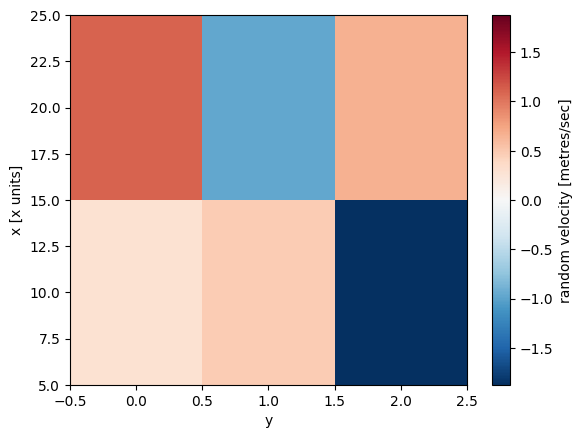

In [15]:
data.plot()